# SALES PREDICTION USING PYTHON

### Import Libraries

In [9]:
# for data processing & data wrangling
import numpy as np
import pandas as pd
# for visualization
import matplotlib.pyplot as plt
import seaborn as sns
# model selection libraries
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
# for ML Model implementation
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
# evaluation metric libraries
from sklearn import metrics
# for warnings
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [10]:
# Load
ds = pd.read_csv("Advertising.csv")
# First View
ds.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Rows and Columns count
ds.shape

(200, 5)

##### Columns

In [5]:
ds.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

##### Discription

In [6]:
ds.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


##### Duplicate Values

In [8]:
dup = ds.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


##### Null Values

In [9]:
ds.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Data Visualization

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'TV'}>],
       [<Axes: title={'center': 'Radio'}>,
        <Axes: title={'center': 'Newspaper'}>],
       [<Axes: title={'center': 'Sales'}>, <Axes: >]], dtype=object)

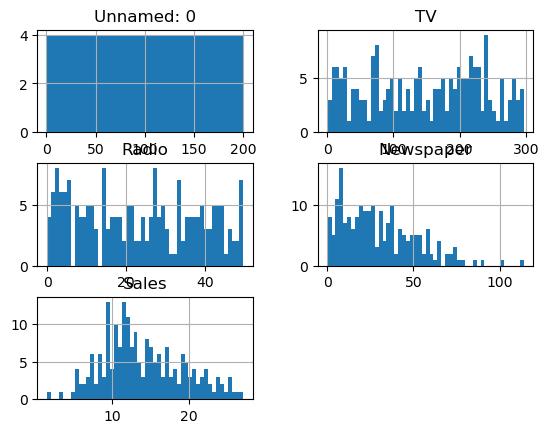

In [10]:
#Histogram Visualization
ds.hist(bins=50)

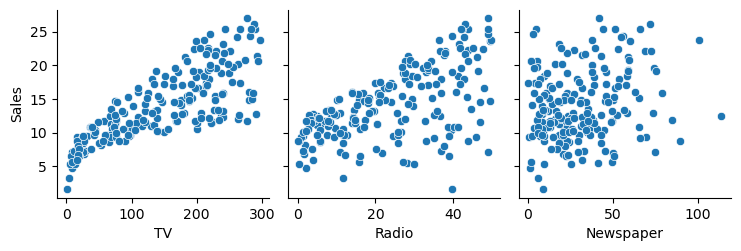

In [11]:
# Linearity assumption between dependent variables and independent variables
sns.pairplot(ds, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", kind="scatter")

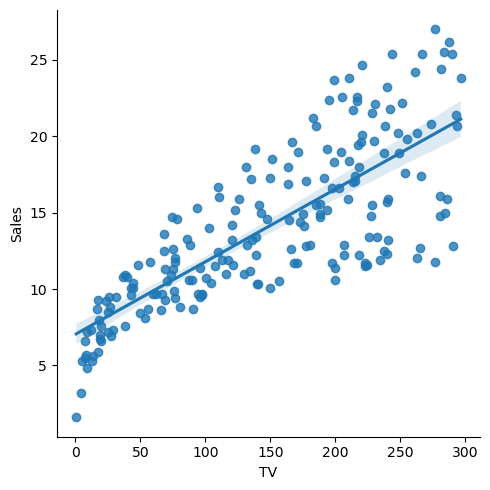

In [12]:
sns.lmplot(x='TV', y='Sales', data=ds)

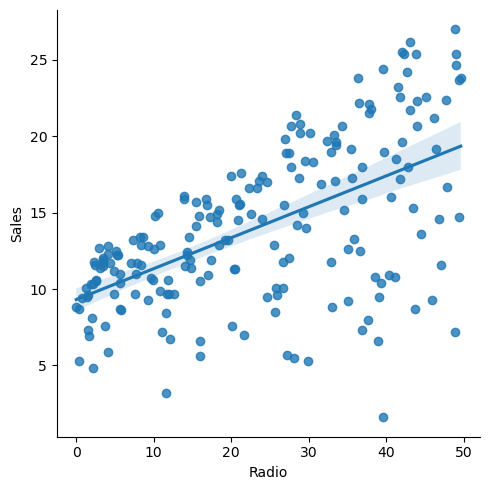

In [13]:
sns.lmplot(x='Radio', y='Sales', data=ds)

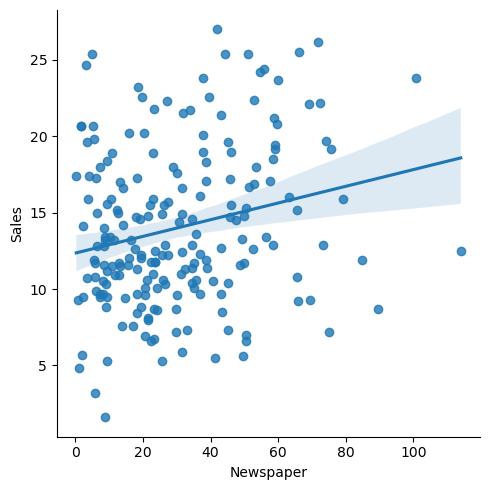

In [14]:
sns.lmplot(x='Newspaper',y= 'Sales', data=ds)

##### Correlation Heatmap

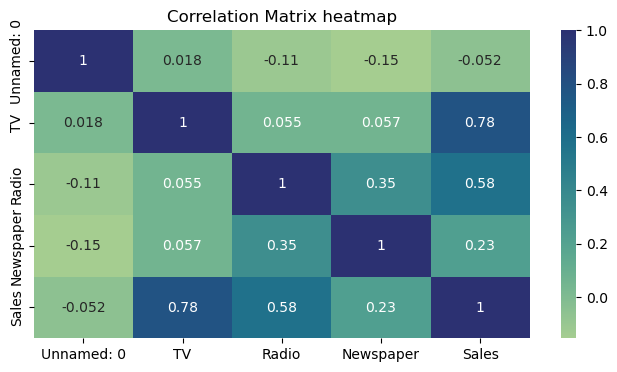

In [5]:
corr_matrix = ds.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='crest')
plt.title('Correlation Matrix heatmap')
plt.show()

### Data Pre-processing

#### Data Scaling

In [6]:
X = ds.drop('Sales',axis=1)    # Data
print("X data:\n\n",X)
Y = ds['Sales']    # Target
print("\nY data:\n\n",Y)

X data:

      Unnamed: 0     TV  Radio  Newspaper
0             1  230.1   37.8       69.2
1             2   44.5   39.3       45.1
2             3   17.2   45.9       69.3
3             4  151.5   41.3       58.5
4             5  180.8   10.8       58.4
..          ...    ...    ...        ...
195         196   38.2    3.7       13.8
196         197   94.2    4.9        8.1
197         198  177.0    9.3        6.4
198         199  283.6   42.0       66.2
199         200  232.1    8.6        8.7

[200 rows x 4 columns]

Y data:

 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


#### Data Splitting

In [33]:
# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
11.7    4
9.7     4
15.9    4
18.0    3
11.6    3
       ..
5.7     1
16.0    1
11.2    1
1.6     1
19.4    1
Name: count, Length: 105, dtype: int64

### ML Model Implementation

In [21]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

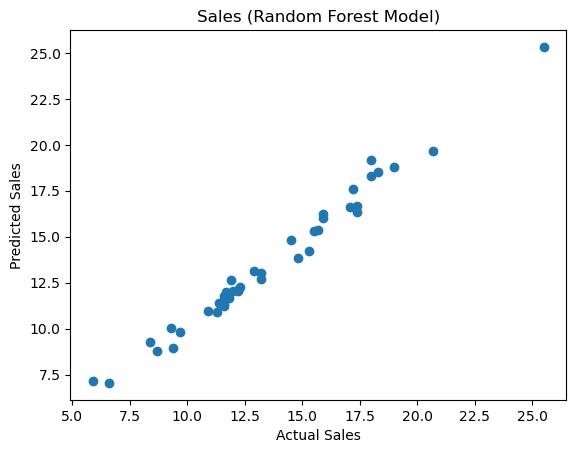

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales (Random Forest Model)")
plt.show()

In [26]:
mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("Mean Squared Error : ", mse)
r2 = metrics.r2_score(y_test, y_pred)
print("R squared Error : ", r2)

Mean Squared Error :  0.5440380501398814
R squared Error :  0.9808596113428393


In [27]:
accuracy = rf.score(x_test,y_test)
print("Accuracy : ", accuracy)

Accuracy :  0.9808596113428393
